### Anomaly Detection and Fraud Analysis 

In [145]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from itertools import combinations

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


from sklearn.metrics import jaccard_score

from pyod.models.ecod import ECOD

import shap

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.set(rc={"figure.figsize":(15, 8)})
sns.set_style("darkgrid")

In [146]:
# Importing Dataset

df = pd.read_csv("C:/Users/Aditya Saxena/Downloads/metaverse_transactions_dataset.csv/metaverse_transactions_dataset.csv")

In [148]:
df

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.7500,low_risk
1,2022-06-14 19:12:46,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.0000,low_risk
2,2022-01-18 16:26:59,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.2500,low_risk
3,2022-06-15 09:20:04,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.7500,low_risk
4,2022-02-18 14:35:30,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.5000,moderate_risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78595,2022-02-13 12:52:27,12,0xa99b9a7f5c5dd37429771efd3b93c6fbe1ab2936,0x5a78c88c5fc1e9b512f6c64e266b46a9db0a7238,660.280373,transfer,Africa,172.000,1,27,random,new,26.2500,low_risk
78596,2022-02-16 16:15:29,16,0xcca095ad2d508c200bda1141f783d77c3e6cbb08,0xb71a4df291ea8e9996a74e77ab63f5abcbfe90f5,310.273397,purchase,Africa,172.000,5,60,focused,established,26.2500,low_risk
78597,2022-08-04 16:06:42,16,0xe0b340171486b08f0c1f4ac607ed776478cefd2b,0x577754308538f4be10a41afb4f8900cd24d7098f,624.674332,purchase,Africa,192.000,1,34,random,new,36.7500,low_risk
78598,2022-02-26 04:06:08,4,0xb0b2f6fc707fbb7f9d27a9f4fe0cb0d6b39a0155,0xd6ba299fdd52f09f01d9648036ca446498c01ac2,401.391592,purchase,Asia,192.168,4,56,focused,established,35.4375,low_risk


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78600 entries, 0 to 78599
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          78600 non-null  object 
 1   hour_of_day        78600 non-null  int64  
 2   sending_address    78600 non-null  object 
 3   receiving_address  78600 non-null  object 
 4   amount             78600 non-null  float64
 5   transaction_type   78600 non-null  object 
 6   location_region    78600 non-null  object 
 7   ip_prefix          78600 non-null  float64
 8   login_frequency    78600 non-null  int64  
 9   session_duration   78600 non-null  int64  
 10  purchase_pattern   78600 non-null  object 
 11  age_group          78600 non-null  object 
 12  risk_score         78600 non-null  float64
 13  anomaly            78600 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 8.4+ MB


In [150]:
# Checking Missing Values

df.isnull().sum()

timestamp            0
hour_of_day          0
sending_address      0
receiving_address    0
amount               0
transaction_type     0
location_region      0
ip_prefix            0
login_frequency      0
session_duration     0
purchase_pattern     0
age_group            0
risk_score           0
anomaly              0
dtype: int64

### Exploratory Data Analysis

#### Univariate Data Analysis

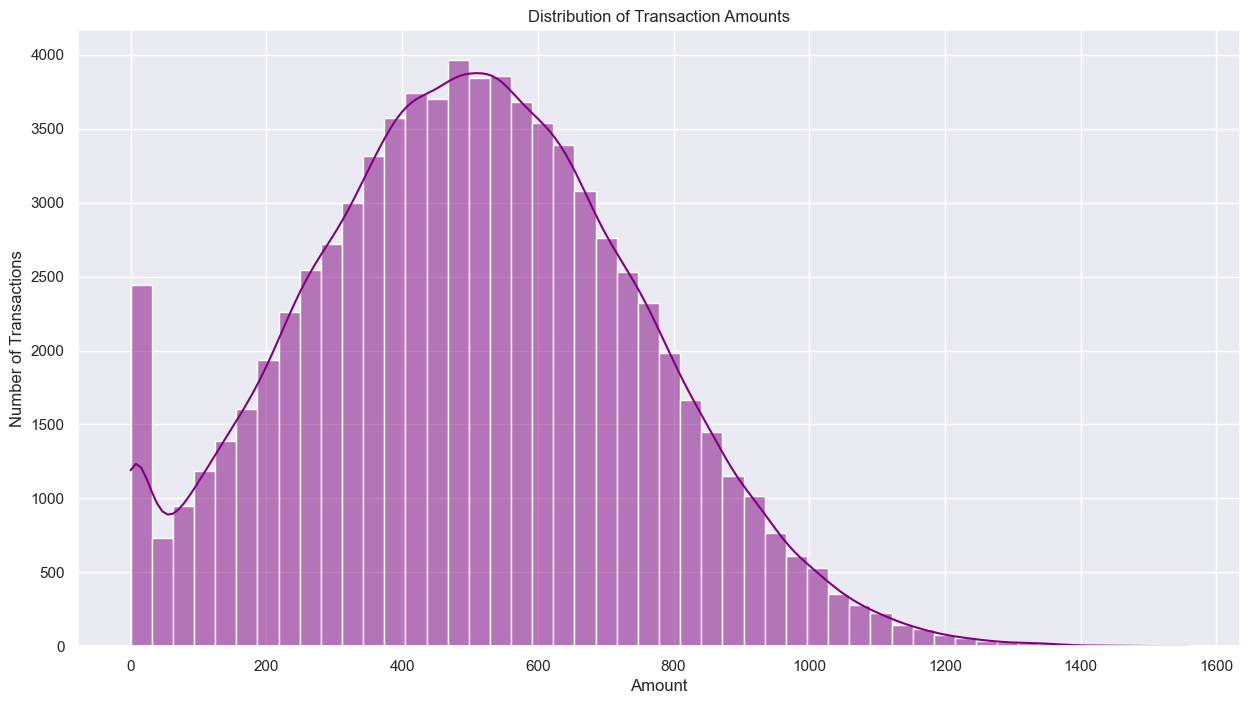

In [151]:
g = sns.histplot(df['amount'], bins=50, kde=True, color='purple')
g.set(title='Distribution of Transaction Amounts',
      xlabel='Amount',
      ylabel='Number of Transactions');

>The transaction amount is right-skewed with a concentration around ₹500 and a long tail of higher values.

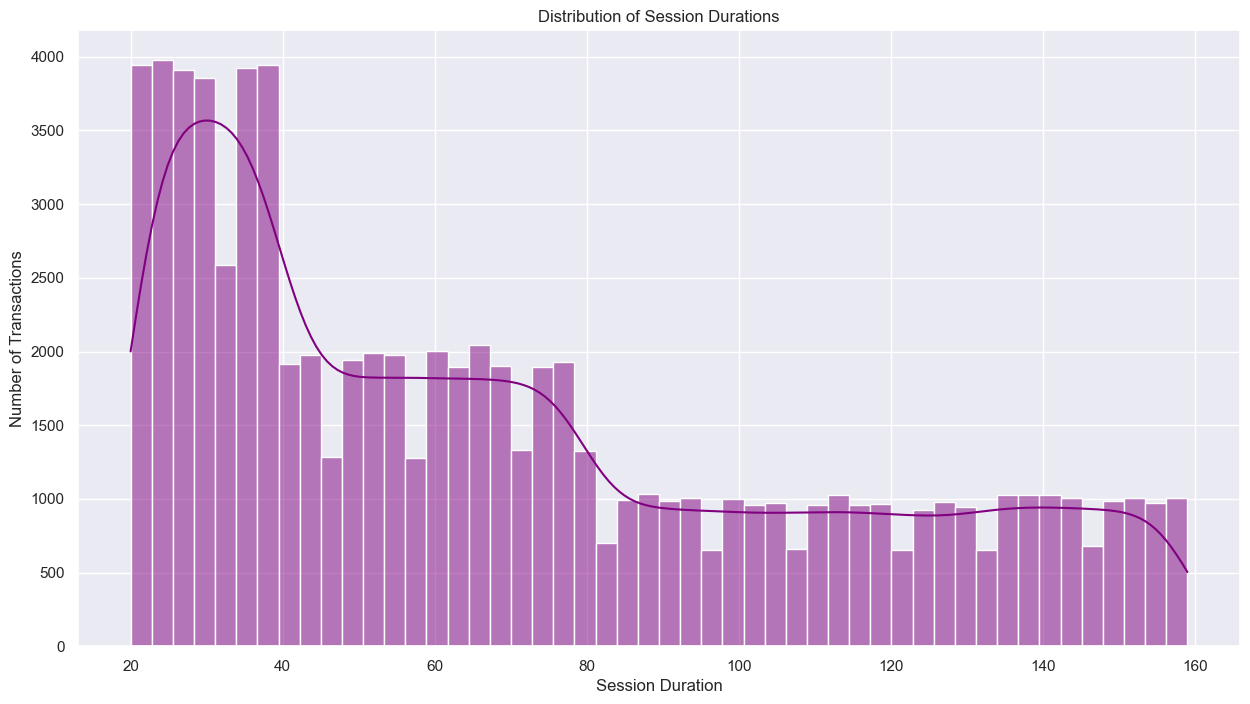

In [152]:
g = sns.histplot(df['session_duration'], bins=50, kde=True, color='purple')
g.set(title='Distribution of Session Durations',
      xlabel='Session Duration',
      ylabel='Number of Transactions');

>Most sessions are short (around 20–40 mins), with a gradual decline and occasional spikes in longer durations.

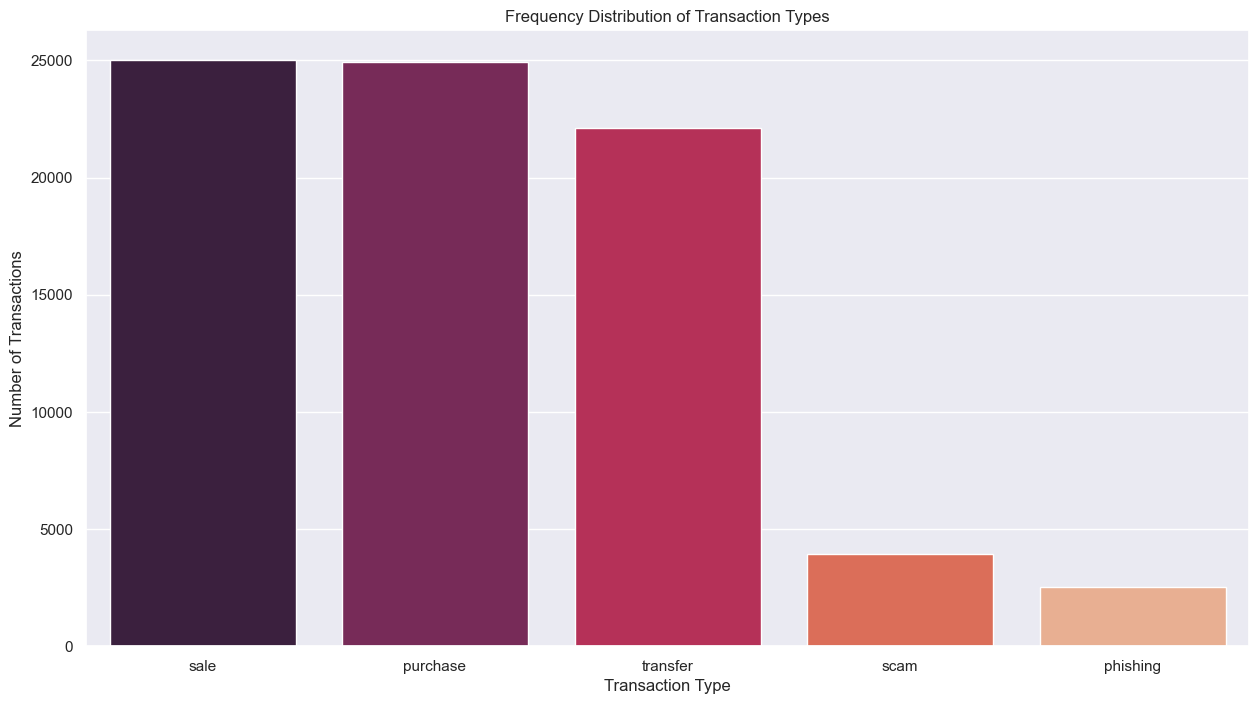

In [153]:
g = sns.countplot(x='transaction_type', data=df, palette='rocket', order=df['transaction_type'].value_counts().index)
g.set(title='Frequency Distribution of Transaction Types',
      xlabel='Transaction Type',
      ylabel='Number of Transactions');

>Most transactions are either sale, purchase, or rare, with scam and phishing being rare.

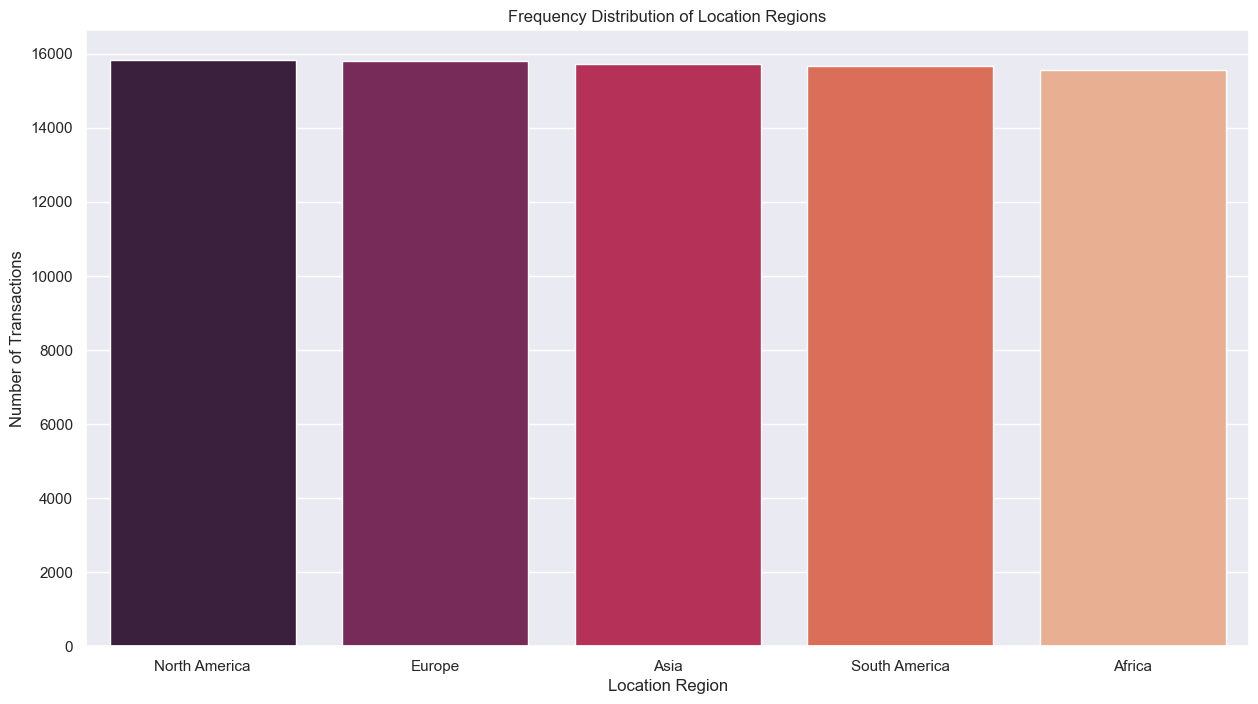

In [154]:
g = sns.countplot(x='location_region', data=df, palette='rocket', order=df['location_region'].value_counts().index)
g.set(title='Frequency Distribution of Location Regions',
      xlabel='Location Region',
      ylabel='Number of Transactions');

>Transaction activity is evenly spread across all regions, showing no strong geographical bias.

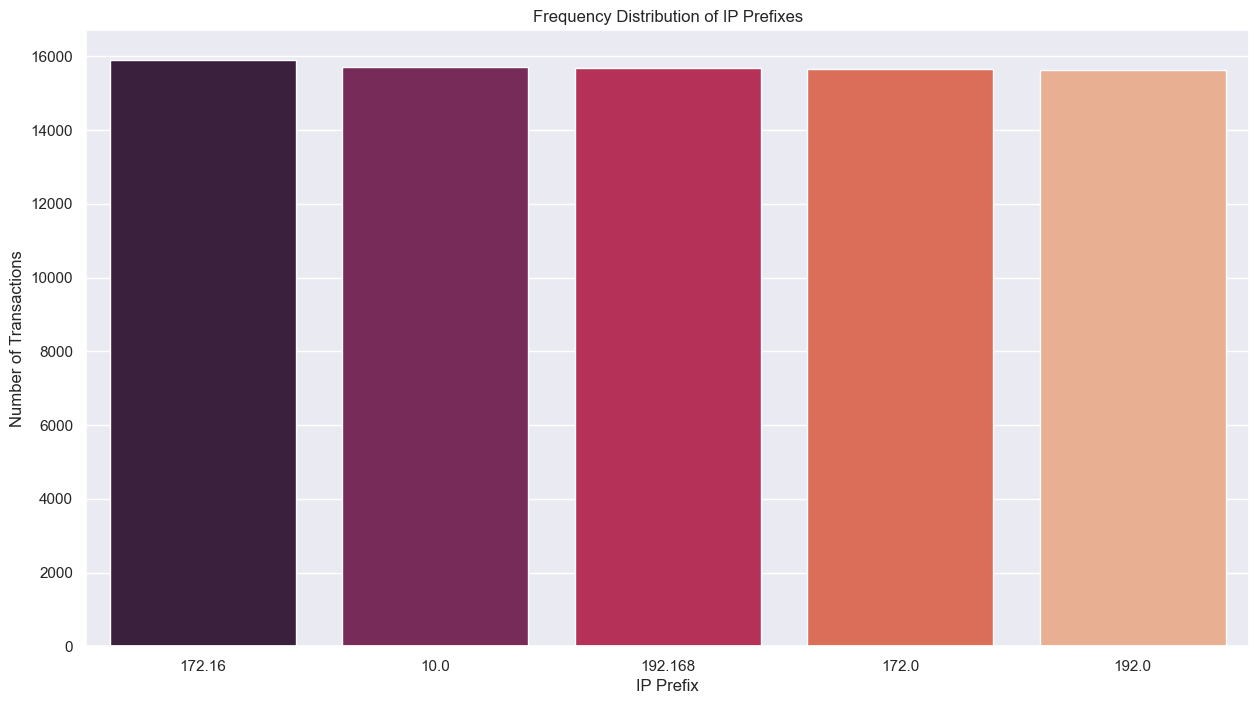

In [155]:
g = sns.countplot(x='ip_prefix', data=df, palette='rocket', order=df['ip_prefix'].value_counts().index)
g.set(title='Frequency Distribution of IP Prefixes',
      xlabel='IP Prefix',
      ylabel='Number of Transactions');

>IP ranges are evenly distributed, indicating no dominant usage pattern based on IP classification.

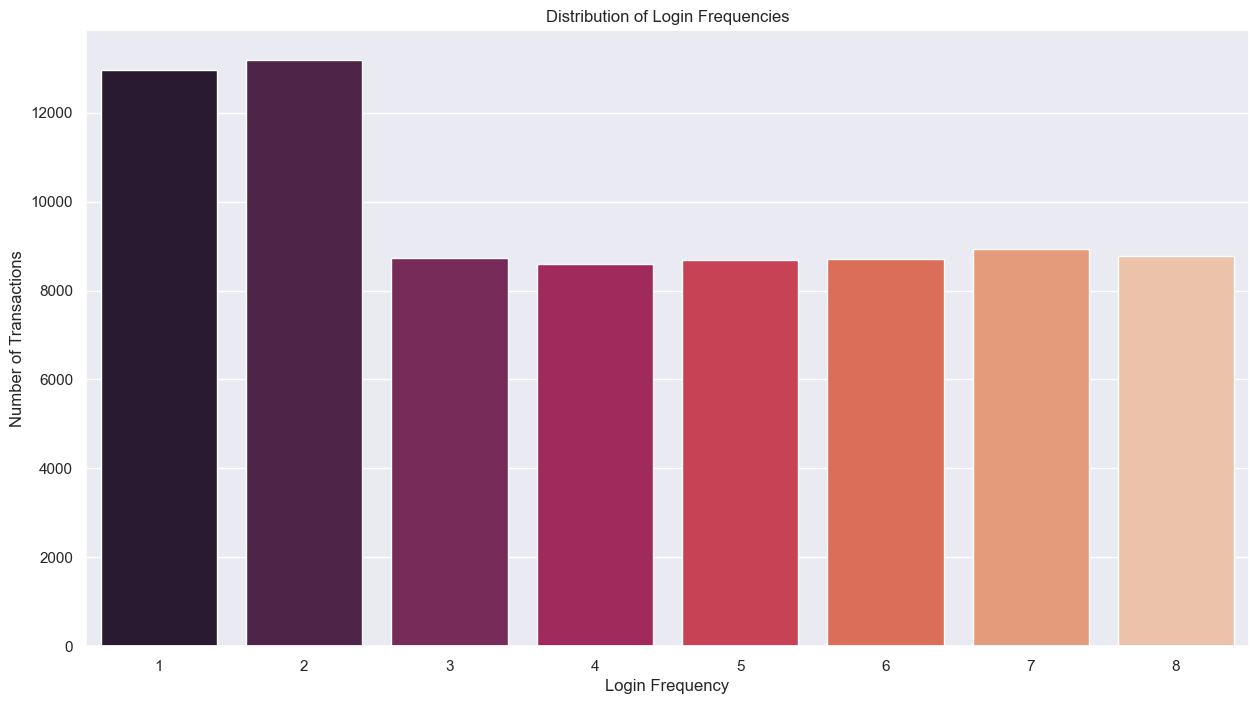

In [156]:
g = sns.countplot(x='login_frequency', data=df, palette='rocket')
g.set(title='Distribution of Login Frequencies',
      xlabel='Login Frequency',
      ylabel='Number of Transactions');

>Users with 1–2 login frequencies dominate the activity, while higher login frequencies (3–8) occur less often and remain relatively stable.

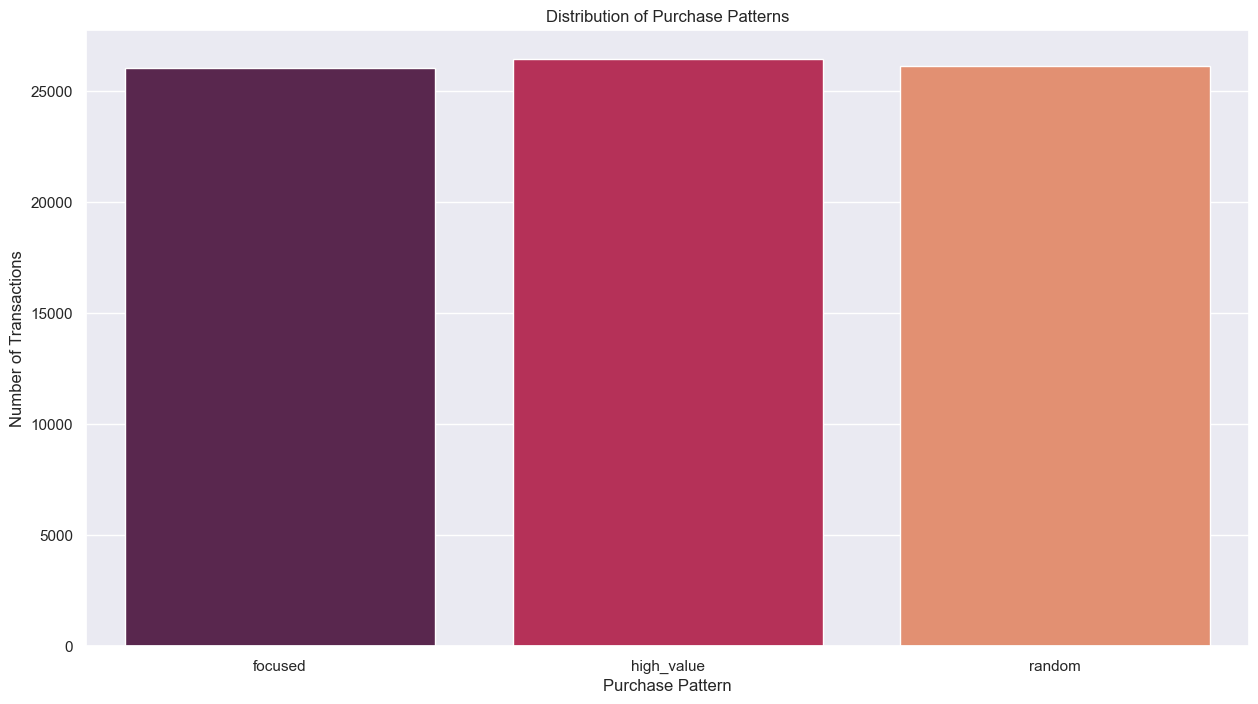

In [157]:
g = sns.countplot(x='purchase_pattern', data=df, palette='rocket')
g.set(title='Distribution of Purchase Patterns',
      xlabel='Purchase Pattern',
      ylabel='Number of Transactions');

>Users are evenly split among high_value, random, and focused purchase patterns.

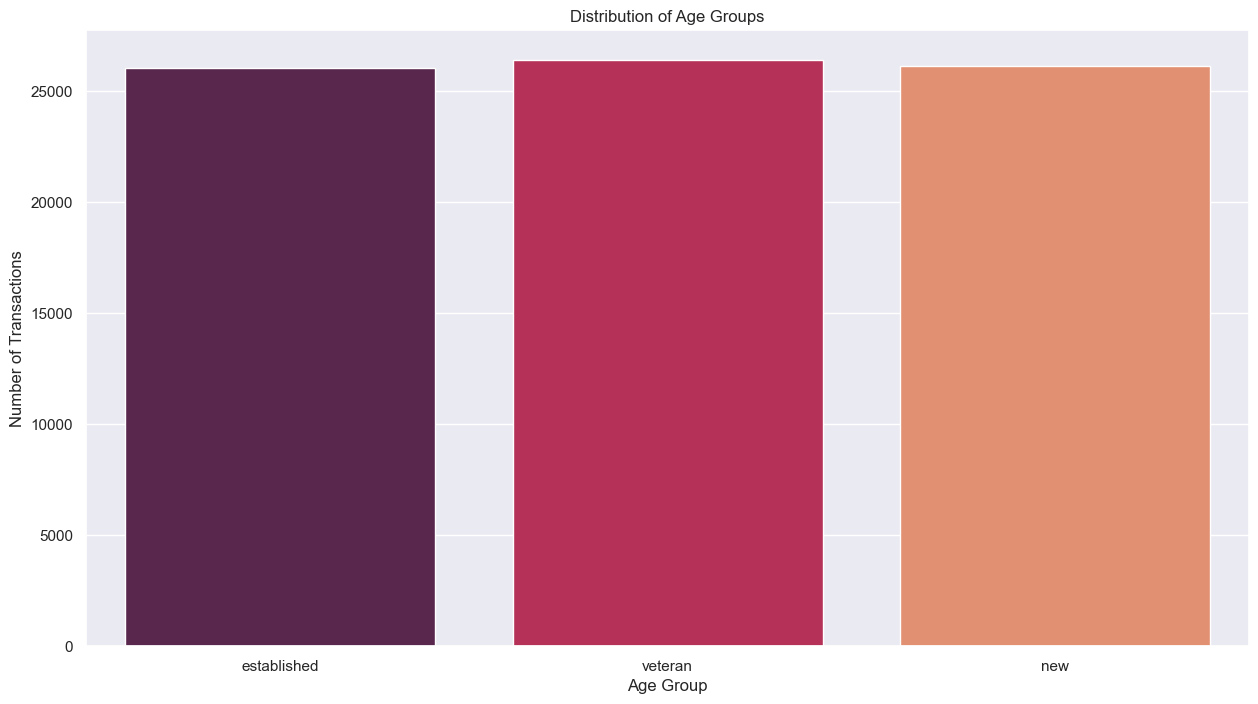

In [158]:
g = sns.countplot(x='age_group', data=df, palette='rocket')
g.set(title='Distribution of Age Groups',
      xlabel='Age Group',
      ylabel='Number of Transactions');

>The dataset is almost equally divided among veteran, new, and established age categories.

#### Bivariate Data Analysis

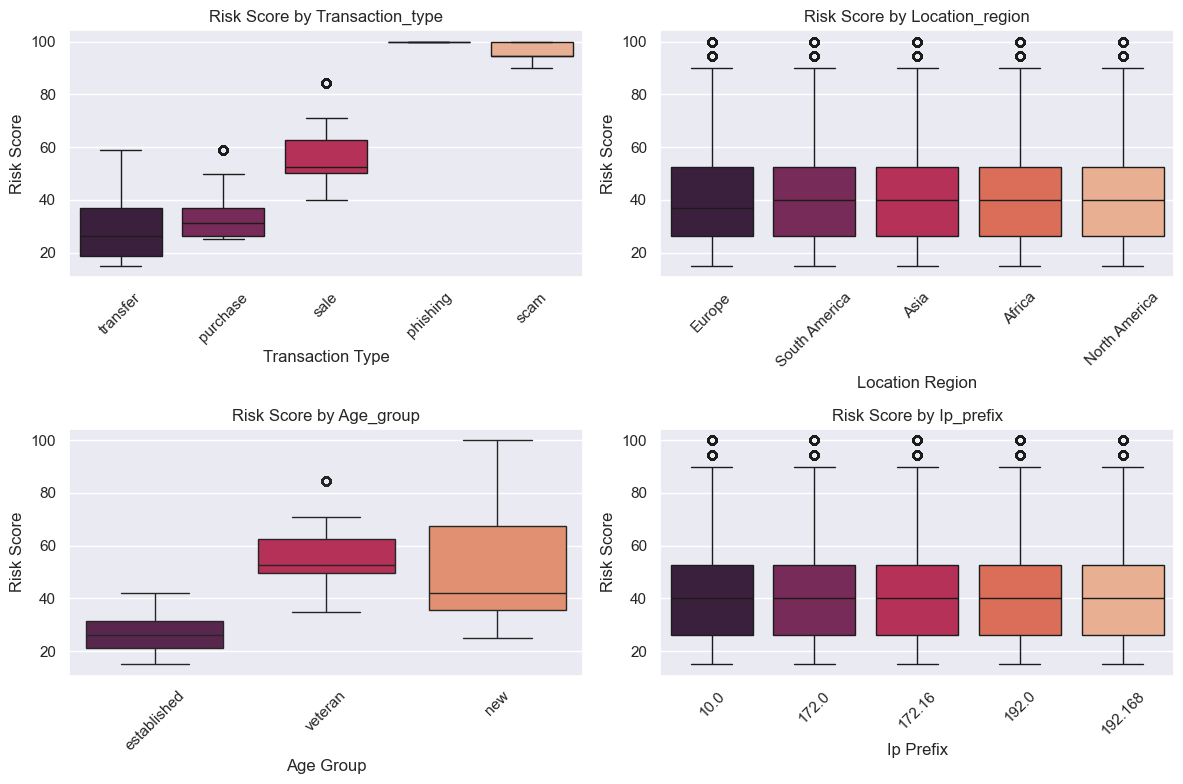

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical features you want on x-axis
cat_features = ['transaction_type', 'location_region', 'age_group', 'ip_prefix']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 grid for 4 plots
axes = axes.flatten()

# Loop through categorical features
for i, feature in enumerate(cat_features):
    g = sns.boxplot(x=feature, y='risk_score', data=df, palette='rocket', ax=axes[i])
    g.set(title=f'Risk Score by {feature.capitalize()}',
          xlabel=feature.replace("_", " ").title(),
          ylabel='Risk Score')
    g.tick_params(axis='x', rotation=45)  # Rotate labels if long

plt.tight_layout()
plt.show()


Risk Score by Transaction Type
>Fraudulent transactions (phishing, scam) show the highest and most consistent risk score, unlike regular ones which vary widely.

Risk Score by Location Region
>Median risk score are similar across regions, though all have a spread of low to very high values.

Risk Score by Age Group
>New users show the widest spread and highest risk score, while established users show smaller variation and low risk scores.

Risk Score by IP Prefix
>Risk Score distributions remain almost identical across IP prefixes, suggesting prefix alone isn’t a strong differentiator.

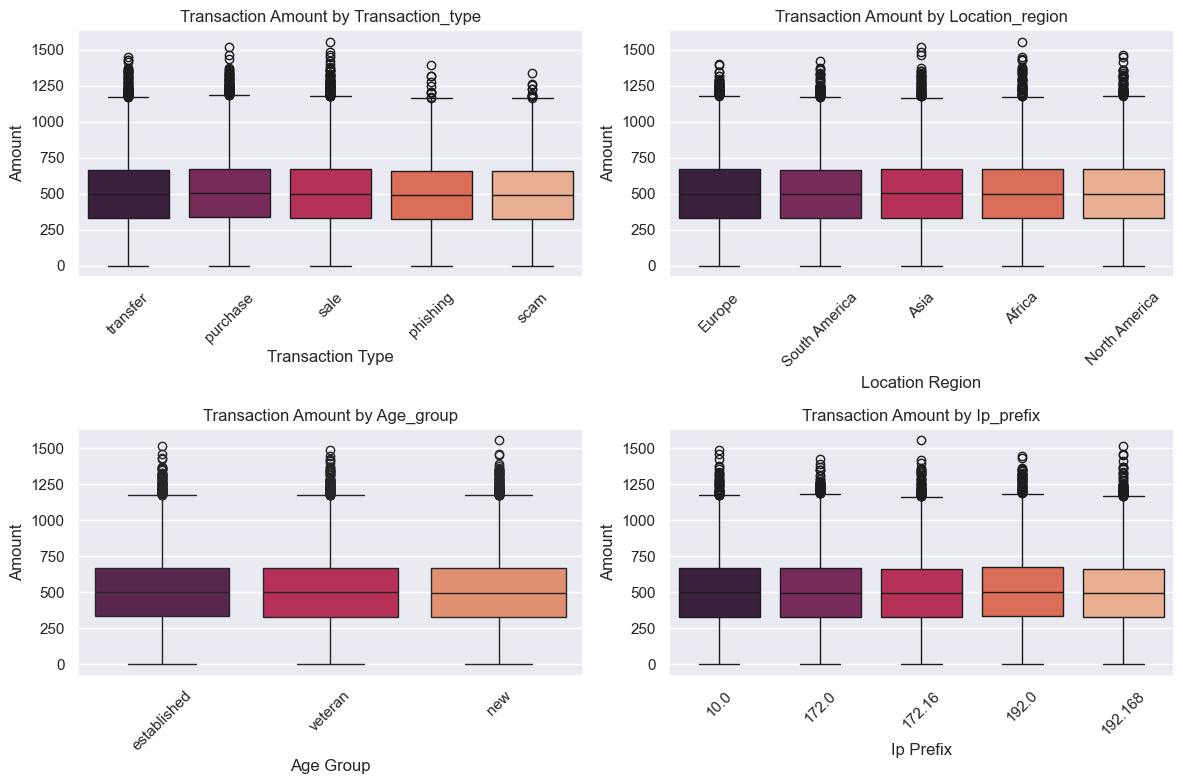

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical features you want on x-axis
cat_features = ['transaction_type', 'location_region', 'age_group', 'ip_prefix']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 grid for 4 plots
axes = axes.flatten()

# Loop through categorical features
for i, feature in enumerate(cat_features):
    g = sns.boxplot(x=feature, y='amount', data=df, palette='rocket', ax=axes[i])
    g.set(title=f'Transaction Amount by {feature.capitalize()}',
          xlabel=feature.replace("_", " ").title(),
          ylabel='Amount')
    g.tick_params(axis='x', rotation=45)  # Rotate labels if long

plt.tight_layout()
plt.show()


Amount by Transaction Type 
>Fraudulent types (phishing, scam) don’t always stand out by amount, but they exhibit high spread, which may indicate irregular behavior compared to normal transfers/purchases.

Amount by Location Region
>While transaction patterns are globally similar, Europe & Asia have larger average amounts, which could be a risk zone for monitoring.

Transaction Amount by Age Group
>New users may pose higher fraud risk because they conduct transactions with unusual variance. Monitoring them more closely could help detect fraud early.

Transaction Amount by IP Prefix
>Fraudulent transactions are not strongly tied to IP prefix; amounts behave similarly.

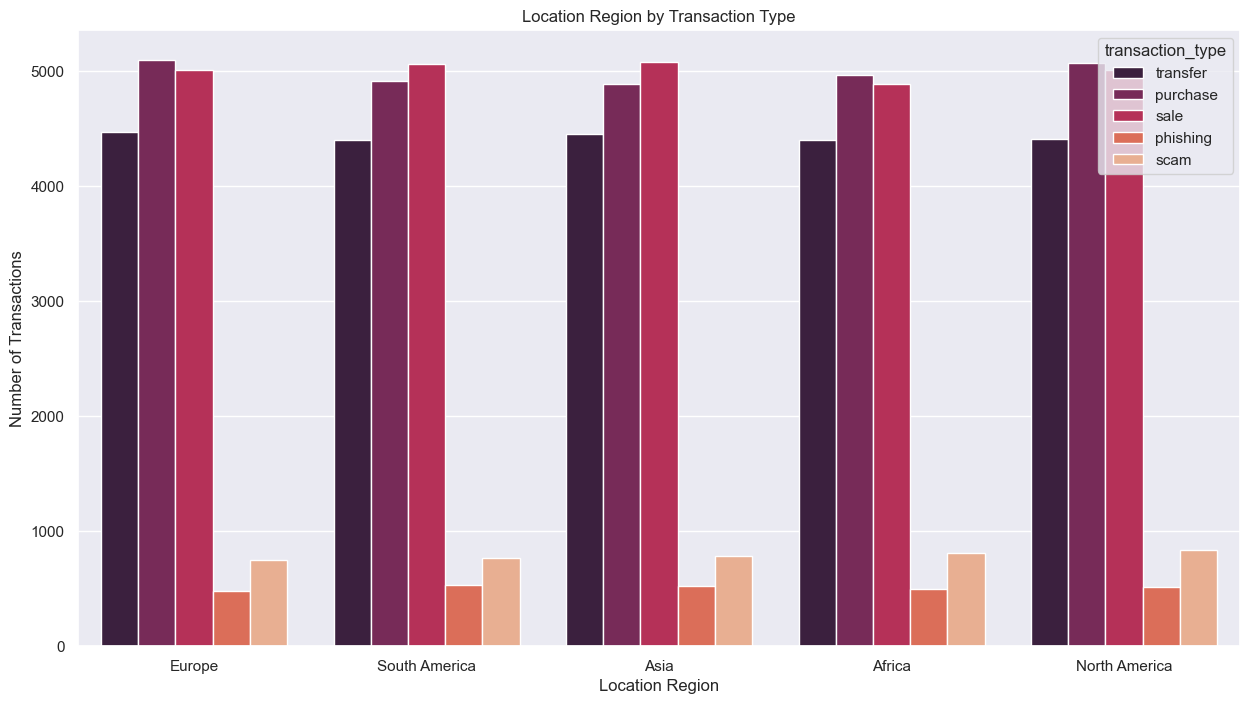

In [161]:
g = sns.countplot(x='location_region', hue='transaction_type', data=df, palette='rocket')
g.set(title='Location Region by Transaction Type',
      xlabel='Location Region',
      ylabel='Number of Transactions');

Location Region by Transaction Type
>Normal transactions (transfer, purchase, sale) dominate across all regions, while fraudulent ones (phishing, scam) are significantly fewer but consistent worldwide.

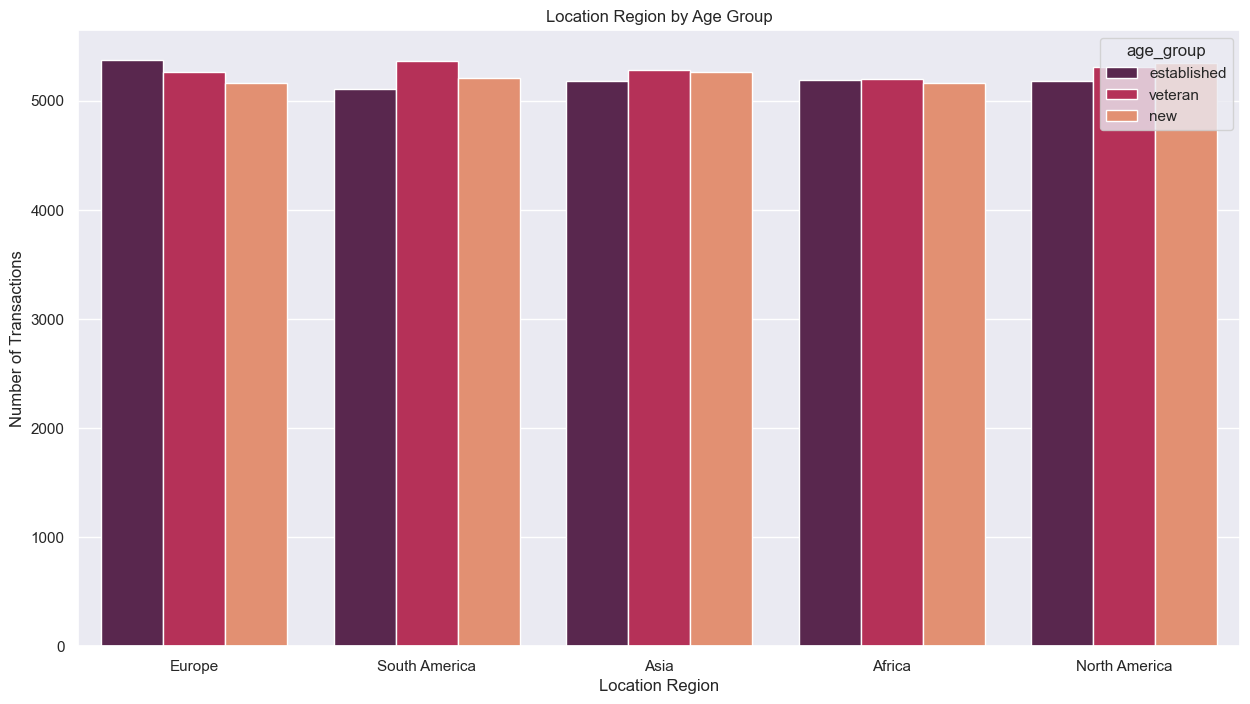

In [162]:
g = sns.countplot(x='location_region', hue='age_group', data=df, palette='rocket')
g.set(title='Location Region by Age Group',
      xlabel='Location Region',
      ylabel='Number of Transactions');

Location Region by Age Group
>Transactions are evenly distributed among established, veteran, and new users across all regions, showing balanced user engagement globally.

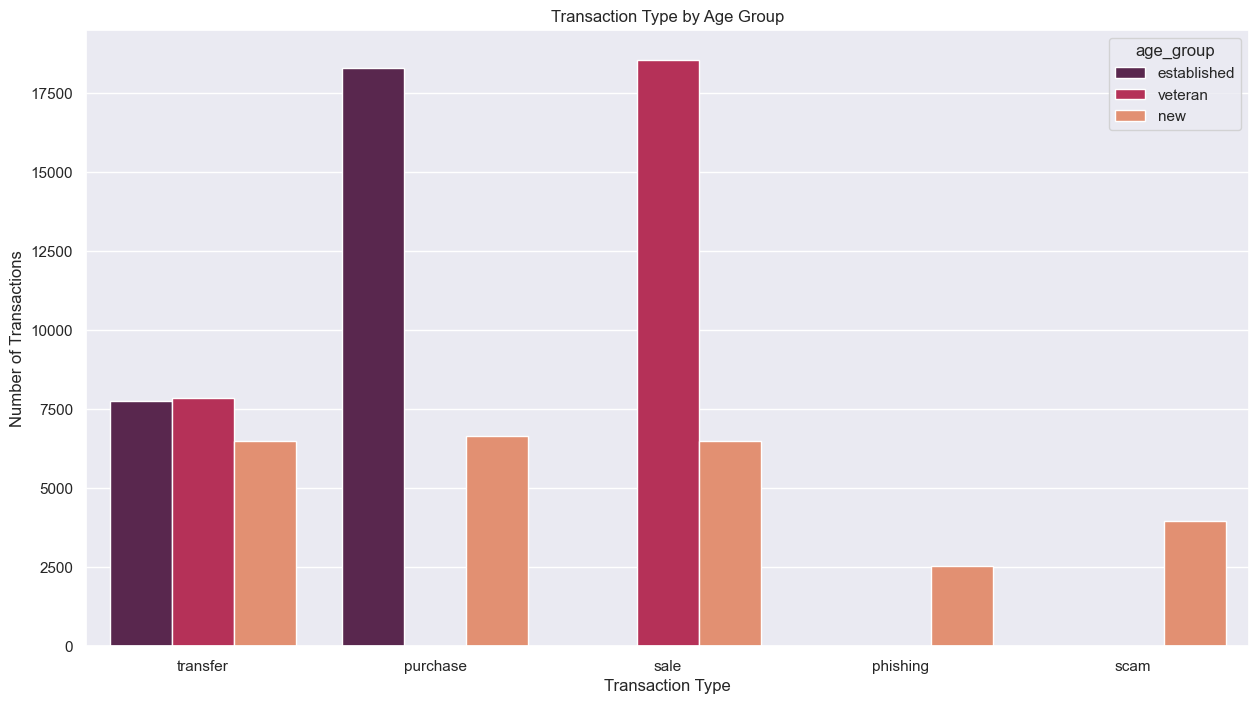

In [163]:
g = sns.countplot(x='transaction_type', hue='age_group', data=df, palette='rocket')
g.set(title='Transaction Type by Age Group',
      xlabel='Transaction Type',
      ylabel='Number of Transactions');

Transaction Type by Age Group
>Established users lead in purchases, veterans dominate sales, while fraudulent transactions (phishing, scam) are almost exclusively linked to new users.

### Feature Engineering

In [164]:
df['is_night'] = df['hour_of_day'].apply(lambda x: 1 if 0 <= x <= 6 else 0)

df['is_working_hour'] = df['hour_of_day'].apply(lambda x: 1 if 9 <= x <= 18 else 0)

df['login_session_ratio'] = df['login_frequency'] / (df['session_duration'] + 1)

df["timestamp"] = pd.to_datetime(df["timestamp"])

df["day_of_week"] = df["timestamp"].dt.dayofweek  

df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)


Engineered Features

is_night
>Captures logins during late-night hours (0–6), which can often be associated with suspicious activity.

is_working_hour
>Marks whether activity falls in business hours (9–18). Helps distinguish between “normal” vs. “off-hour” access.

login_session_ratio
>Ratio of login frequency to session duration. Helps detect “bursty” login behavior (many logins but short sessions → possibly malicious).

day_of_week
>Encodes weekday (0=Monday … 6=Sunday).

is_weekend
>Binary flag for weekend (Sat/Sun). Helps spot anomalies like sudden activity on weekends if user normally works weekdays.

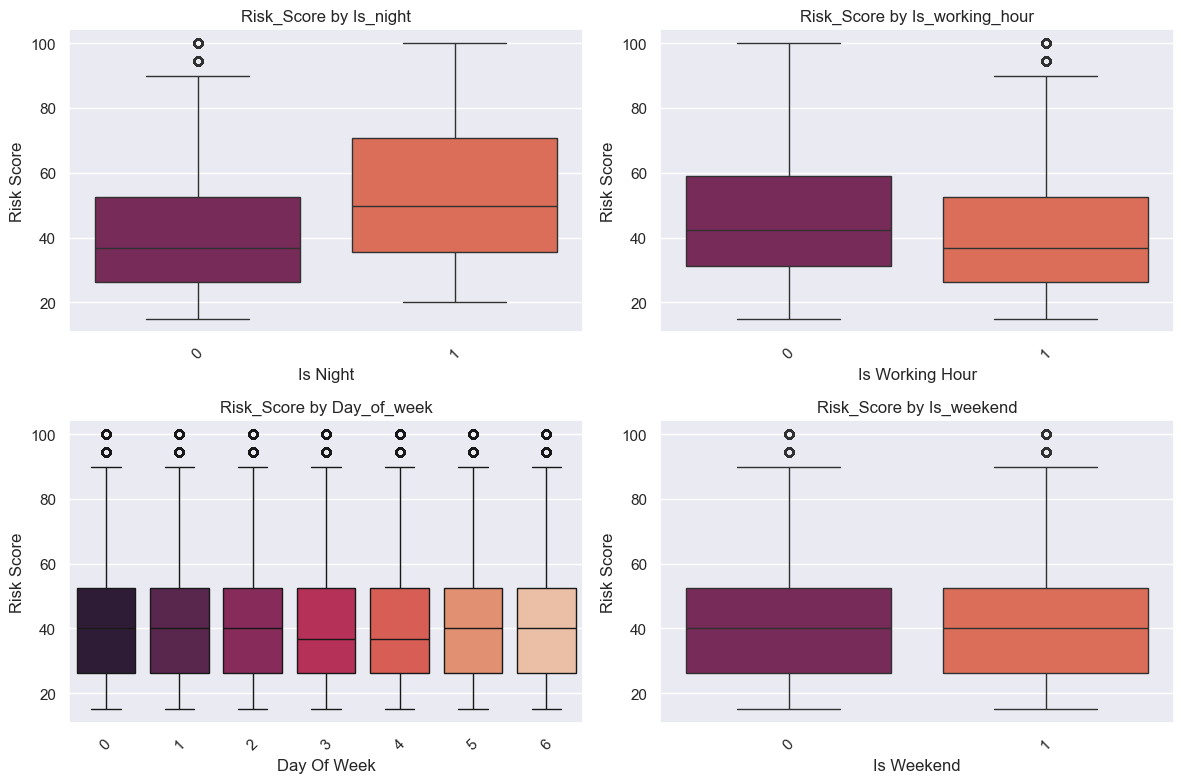

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical features you want on x-axis
cat_features = ['is_night',	'is_working_hour','day_of_week',	'is_weekend']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 grid for 4 plots
axes = axes.flatten()

# Loop through categorical features
for i, feature in enumerate(cat_features):
    g = sns.boxplot(x=feature, y='risk_score', data=df, palette='rocket', ax=axes[i])
    g.set(title=f'Risk_Score by {feature.capitalize()}',
          xlabel=feature.replace("_", " ").title(),
          ylabel='Risk Score')
    g.tick_params(axis='x', rotation=45)  # Rotate labels if long

plt.tight_layout()
plt.show()

Risk_Score by Is Night
>Activity at night is riskier and more variable, indicating higher anomaly/fraud potential during off-hours.

Risk_Score by Is Working Hour
>Legitimate activity is more common during office hours, while off-hours activity correlates with higher risk.

Risk_Score by Day of Week
>Risk is relatively stable across weekdays, but there’s a subtle uptick closer to the weekend — maybe tied to higher transaction activity or reduced monitoring.

In [166]:
df = df.drop(['login_frequency','session_duration','timestamp','risk_score','anomaly'],axis=1)

### Preprocessing

In [167]:
categorical_features = ['transaction_type','purchase_pattern','location_region','age_group']
numerical_features = ['amount', 'login_session_ratio']
binary_features = ['is_night', 'is_working_hour', 'is_weekend']

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),                 
        ("bin", "passthrough", binary_features),              
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

#### Anomaly Detection

In [168]:
models = {
    "IsolationForest": IsolationForest(
        n_estimators=200, contamination=0.05, random_state=42
    ),
    "LOF": LocalOutlierFactor(
        n_neighbors=20, contamination=0.05, novelty=True
    ),
    "ECOD": ECOD(contamination=0.05),
}

X_transformed = preprocessor.fit_transform(df)

results = {}

for name, model in models.items():
    print(f"Training {name}...")

    if name == "IsolationForest":
        model.fit(X_transformed)
        scores = -model.decision_function(X_transformed)
        labels = model.predict(X_transformed)
        labels = np.where(labels == -1, 1, 0)

    elif name == "LOF":
        model.fit(X_transformed)
        scores = -model.decision_function(X_transformed)
        labels = model.predict(X_transformed)
        labels = np.where(labels == -1, 1, 0)

    else:  # ECOD
        model.fit(X_transformed)
        scores = model.decision_scores_
        labels = model.labels_

    # Save raw scores and labels
    results[name] = {"scores": scores, "labels": labels}

output = df.copy()
for name in models.keys():
    output[f"{name}_score"] = results[name]["scores"]
    output[f"{name}_label"] = results[name]["labels"]


Training IsolationForest...
Training LOF...
Training ECOD...


### Number of Anomalous Transactions Flagged by each Algorithm

In [169]:
fraud_counts = {}

for name in results.keys(): 
    labels = results[name]["labels"]
    fraud_count = (labels == 1).sum()
    fraud_counts[name] = fraud_count

fraud_summary = pd.DataFrame.from_dict(
    fraud_counts, orient="index", columns=["Number of Anomalous Transactions"]
)

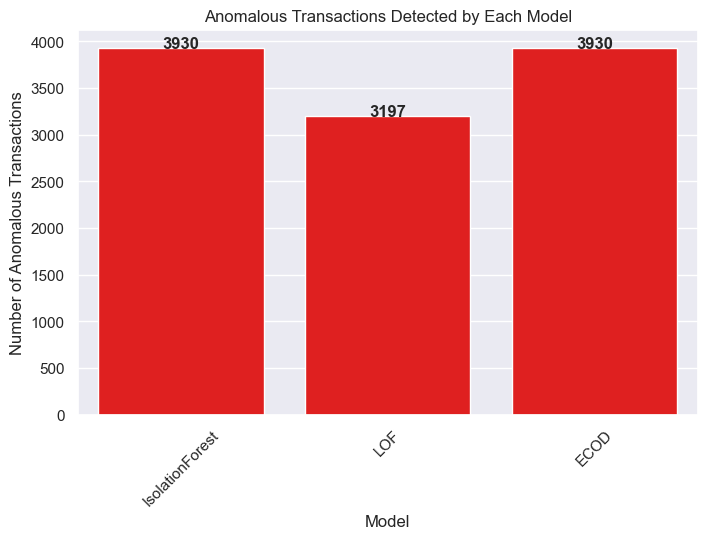

In [170]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=fraud_summary.index, 
    y=fraud_summary["Number of Anomalous Transactions"], 
    color="red"
)
plt.xlabel("Model")
plt.ylabel("Number of Anomalous Transactions")
plt.title("Anomalous Transactions Detected by Each Model")
plt.xticks(rotation=45)

# Add counts on top of bars
for i, v in enumerate(fraud_summary["Number of Anomalous Transactions"]):
    plt.text(i, v + 1, str(v), ha='center', fontweight='bold')

plt.show()

### Distribution of Anomaly Scores Across Models

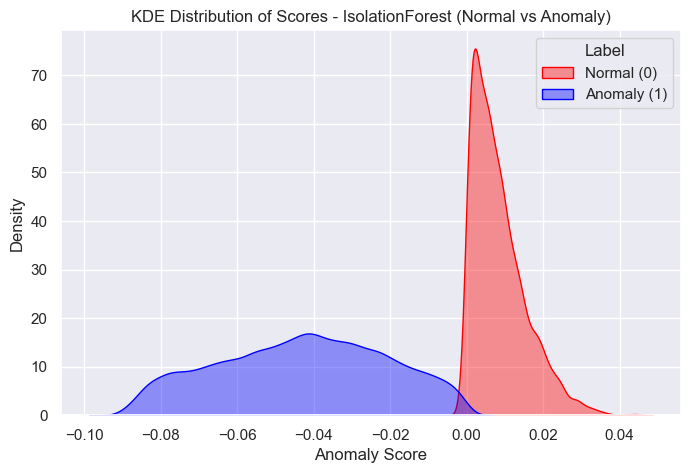

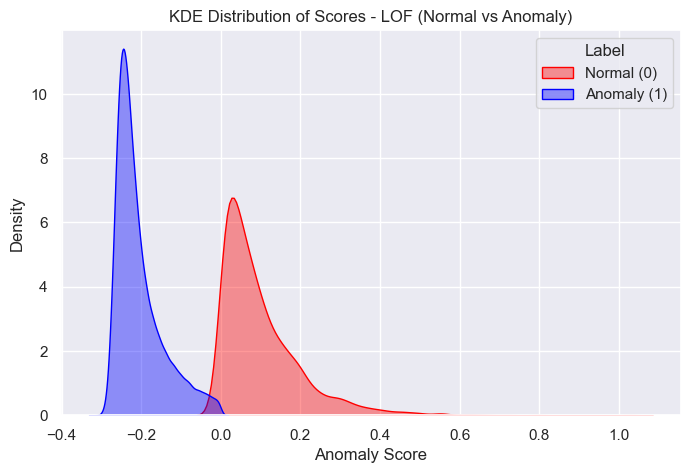

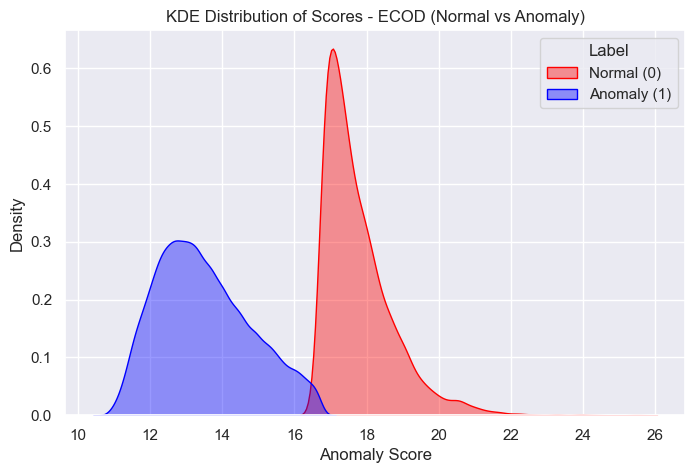

In [171]:
for name in models.keys():
    plt.figure(figsize=(8,5))
    sns.kdeplot(
        data=output, 
        x=f"{name}_score", 
        hue=f"{name}_label", 
        fill=True, 
        common_norm=False, 
        palette={0: "blue", 1: "red"}, 
        alpha=0.4
    )
    plt.title(f"KDE Distribution of Scores - {name} (Normal vs Anomaly)")
    plt.xlabel("Anomaly Score")
    plt.ylabel("Density")
    plt.legend(title="Label", labels=["Normal (0)", "Anomaly (1)"])
    plt.show()


Insights:

1. Isolation Forest

>Normal (red) is tightly clustered near 0 to +0.02. Anomalies (blue) spread across negative scores, centered around -0.05.

>Strong separation between normal and anomaly clusters → anomalies consistently get much lower scores.

2. LOF (Local Outlier Factor)

>Normal scores peak near 0.1 to 0.2. Anomalies concentrated around -0.2 to 0.0.

>Fraudulent transactions appear well-separated but slightly noisier than Isolation Forest. Indicates LOF can capture anomalies based on local neighborhood differences.

3. ECOD (Extreme Value Detector)

> Normal scores are higher (~16–20). Anomaly scores are lower. (~11–14).

>ECOD shows the strongest separation among the three models.Fraudulent transactions consistently lie in the lower extreme tail of distributions.

### Jaccard Similarity

In [172]:
models = ["IsolationForest_label", "ECOD_label", "LOF_label"]

jaccard_results = {}

for (m1, m2) in combinations(models, 2):
    score = jaccard_score(output[m1], output[m2])
    jaccard_results[f"{m1} vs {m2}"] = score

jaccard_df = pd.DataFrame(list(jaccard_results.items()), columns=["Model Pair", "Jaccard Similarity"])
print(jaccard_df)

                            Model Pair  Jaccard Similarity
0  IsolationForest_label vs ECOD_label            0.234103
1   IsolationForest_label vs LOF_label            0.080831
2              ECOD_label vs LOF_label            0.166639


Insights:

1. Isolation Forest vs ECOD

>Moderate overlap (~23%).

>Suggests they agree on some core anomalies but also catch different subsets.

>This is actually healthy: ECOD focuses on extreme deviations (statistical view), while IF isolates rare patterns.

>Transactions repeatedly flagged by both are very high-risk candidates.

2. Isolation Forest vs LOF

> Very low overlap (~8%).

> LOF is local density-based, so it’s sensitive to neighborhood structures.

> Means LOF is catching anomalies that IF mostly ignores.

>LOF might be surfacing contextual anomalies (normal globally but odd locally), which IF doesn’t consider fraud-like.

>These could be false positives or hidden frauds, so they need careful review.

3. ECOD vs LOF

> Low-moderate overlap (~17%).

> Indicates partial alignment but still large disagreement.

> ECOD is global, LOF is local → their intersection anomalies are those that are globally extreme and locally inconsistent, strong fraud suspects.

### Consensus Anomalies: multiple models agree that a data point is anomalous

In [173]:
# Boolean masks for each model
iso_mask = output["IsolationForest_label"] == 1
lof_mask = output["LOF_label"] == 1
ecod_mask = output["ECOD_label"] == 1

# Intersection (all models flag anomaly)
consensus_mask = iso_mask & lof_mask & ecod_mask

# Get those transactions
consensus_anomalies = output[consensus_mask]

In [179]:
consensus_anomalies.head()

,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,purchase_pattern,age_group,is_night,is_working_hour,login_session_ratio,day_of_week,is_weekend,IsolationForest_score,IsolationForest_label,LOF_score,LOF_label,ECOD_score,ECOD_label
143,1,0xc1ae19884e5d529872028c3ec1c9fe259d4275b2,0x463667453bef14157dc8fc348fcec7b01c6a71ea,1206.540485,phishing,Africa,172.0,random,new,1,0,0.027778,0,0,0.022116,1,0.004837,1,22.216243,1
881,19,0x27c89593ac9421e73a381d6b4c8693a1475bf286,0xda3ee1edb0c1d856f1423b0ffeeb713cc5da8984,186.494922,phishing,Asia,192.0,random,new,0,0,0.027027,5,1,0.011941,1,0.142190,1,18.683666,1
1289,18,0xf465313404968cbe690f73bff7759b20886fe4a3,0x9aae2a9d1f85990c818365c1df71ea305ad0cef0,268.272566,phishing,Asia,192.0,random,new,0,1,0.027778,6,1,0.009675,1,0.129019,1,18.282698,1
1338,14,0xc7188501b6d376a8fadefe661e52d728b8050503,0xb369fc07c513e166a43b07400c92541eafe4f71b,877.731745,scam,Europe,172.0,random,new,0,1,0.030303,6,1,0.002645,1,0.004797,1,18.353775,1
1393,9,0x11740264e31fed3fb732890389a683275081b2d8,0xc1c425042188c182c720f0853279cadf5e75ca87,1178.537366,scam,North America,192.0,random,new,0,1,0.054054,5,1,0.008131,1,0.037170,1,19.459338,1


### SHAP Explainability : For Transaction at index 143

#### LOF


Feature deviations from neighbors (top 10):
cat__transaction_type_phishing        0.550000
num__amount                           0.396174
cat__location_region_Africa           0.200000
bin__is_night                         0.100000
bin__is_working_hour                  0.000000
cat__age_group_new                    0.000000
cat__age_group_veteran                0.000000
cat__purchase_pattern_high_value      0.000000
cat__purchase_pattern_random          0.000000
cat__location_region_South America    0.000000
dtype: float64


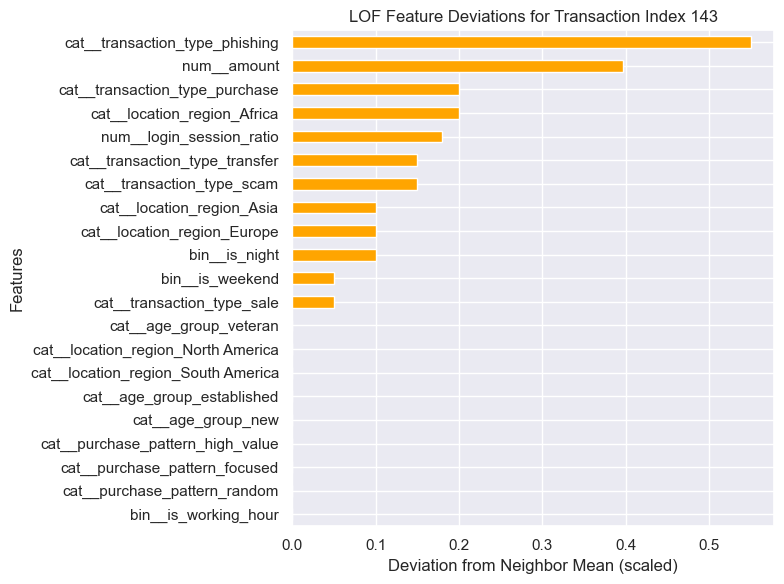

In [175]:
# Find neighbors of the chosen anomaly
neighbors = lof_model.kneighbors([X_transformed[143]], return_distance=False)
neighbor_mean = pd.Series(
    X_transformed[neighbors[0]].mean(axis=0),
    index=preprocessor.get_feature_names_out()
)

# Deviation of the anomaly from mean of its neighbors
deviation = pd.Series(
    X_transformed[143], index=preprocessor.get_feature_names_out()
) - neighbor_mean

print("\nFeature deviations from neighbors (top 10):")
print(deviation.sort_values(ascending=False).head(10))

# Plot deviations
deviation_sorted = deviation.abs().sort_values(ascending=True)

plt.figure(figsize=(8,6))
deviation_sorted.plot(kind="barh", color="orange")
plt.title(f"LOF Feature Deviations for Transaction Index {idx}")
plt.xlabel("Deviation from Neighbor Mean (scaled)")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

Local Outlier Factor compares the density of a transaction with that of its nearest neighbors. It answers: “Is this point isolated compared to its local surroundings?”

Insights:

>Strong deviations in transaction_type_phishing, amount, region_Africa, and night-time transactions.

>These deviations mean the transaction doesn’t blend with its local peer group — e.g., phishing in this region and time is rare relative to others nearby.

> Very effective in flagging context-sensitive anomalies (local peer comparisons).

Best for situations where customer/merchant segments behave differently.

Business angle: Helps detect fraud clusters specific to geography, time, or peer groups, even if globally such transactions aren’t rare.

#### Isolation Forest

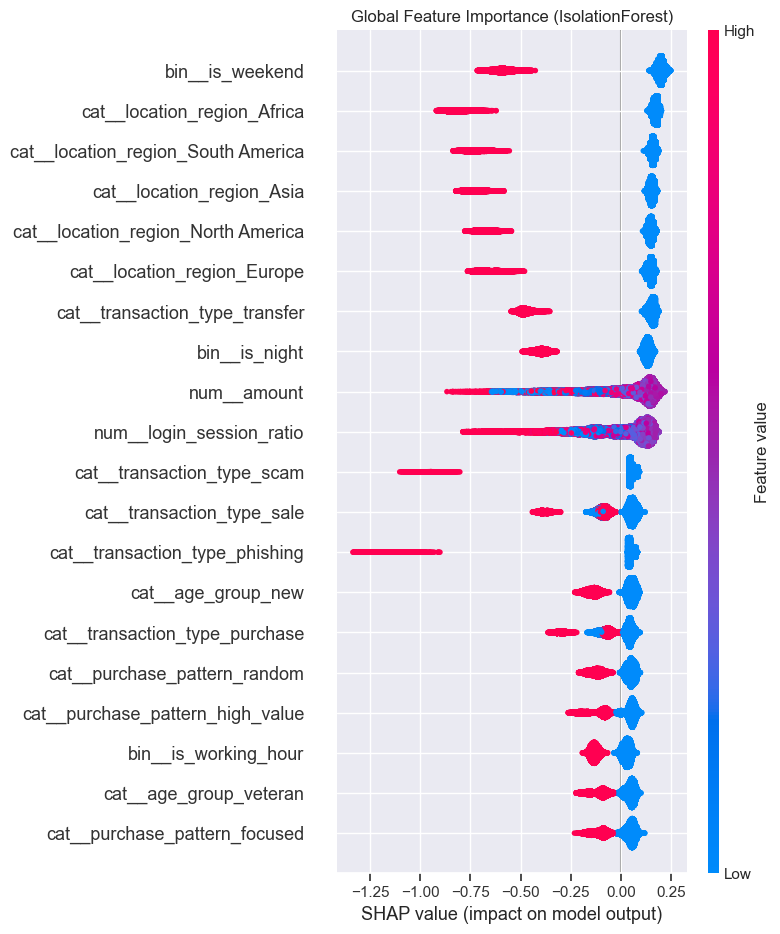

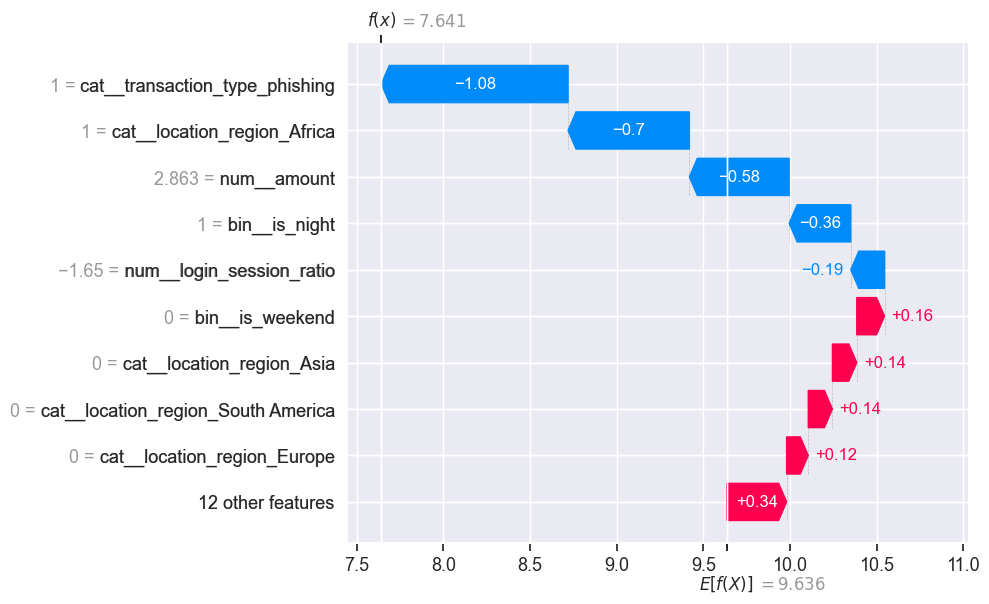

In [176]:
iso_for_shap = IsolationForest(
    n_estimators=200,
    contamination=0.05,
    random_state=42
)
iso_for_shap.fit(X_transformed)

# Build SHAP explainer
explainer = shap.TreeExplainer(iso_for_shap)
shap_values = explainer.shap_values(X_transformed)

feature_names = preprocessor.get_feature_names_out()

# Global Summary Plot
plt.title("Global Feature Importance (IsolationForest)")
shap.summary_plot(shap_values, X_transformed, feature_names=feature_names)

# Local explanation for transaction at iloc[143]
idx = 143

# Waterfall Plot
shap.plots.waterfall(
    shap.Explanation(
        values=shap_values[idx],
        base_values=explainer.expected_value,
        data=X_transformed[idx],
        feature_names=feature_names
    )
)

How it works: Randomly partitions feature space; anomalies are isolated quickly because they lie in sparse regions. It’s more global in nature.

Insights:

Summary plot: 

> phishing, amount, login_session_ratio, and night-time activity stand out globally as frequent anomaly drivers.

Waterfall plot for this transaction:

> phishing, Africa region, and high amount strongly pushed it into the anomalous zone. 
> Factors like login_session_ratio and weekend slightly reduced the anomaly score.

Strength: Provides both global feature importance (what generally drives anomalies) and local breakdowns (why this transaction is suspicious). More robust when you want a holistic fraud pattern view across all customers.

Business angle: Useful for identifying system-wide fraud patterns (e.g., phishing scams in multiple regions). Managers can use this for risk policy updates.

#### ECOD

100%|██████████| 200/200 [05:55<00:00,  1.78s/it]


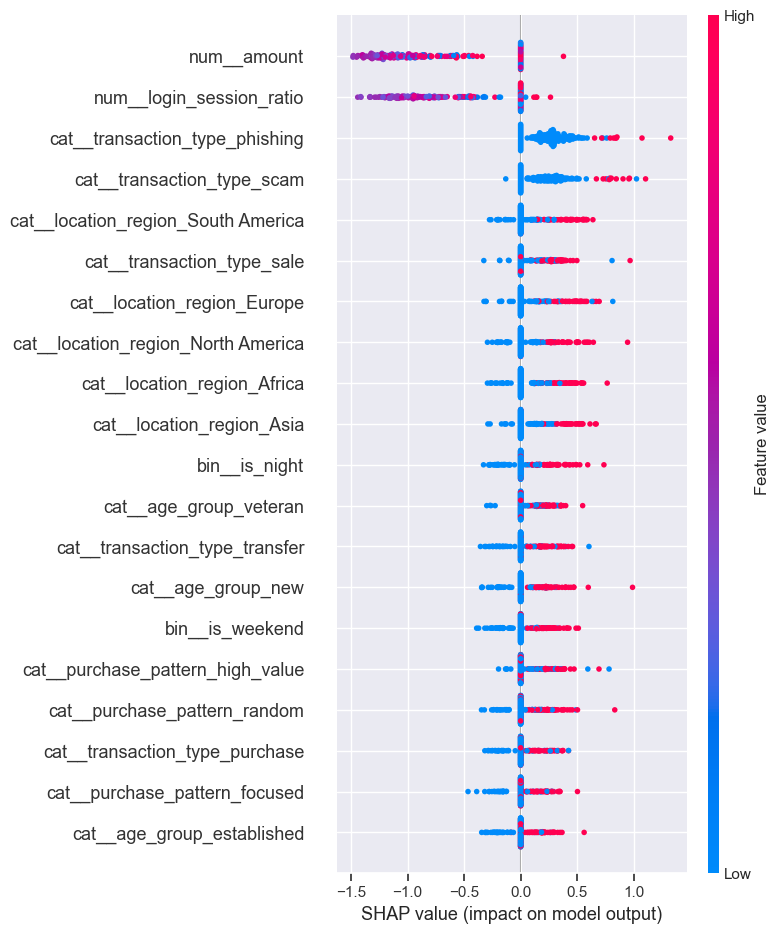

100%|██████████| 1/1 [00:02<00:00,  2.00s/it]


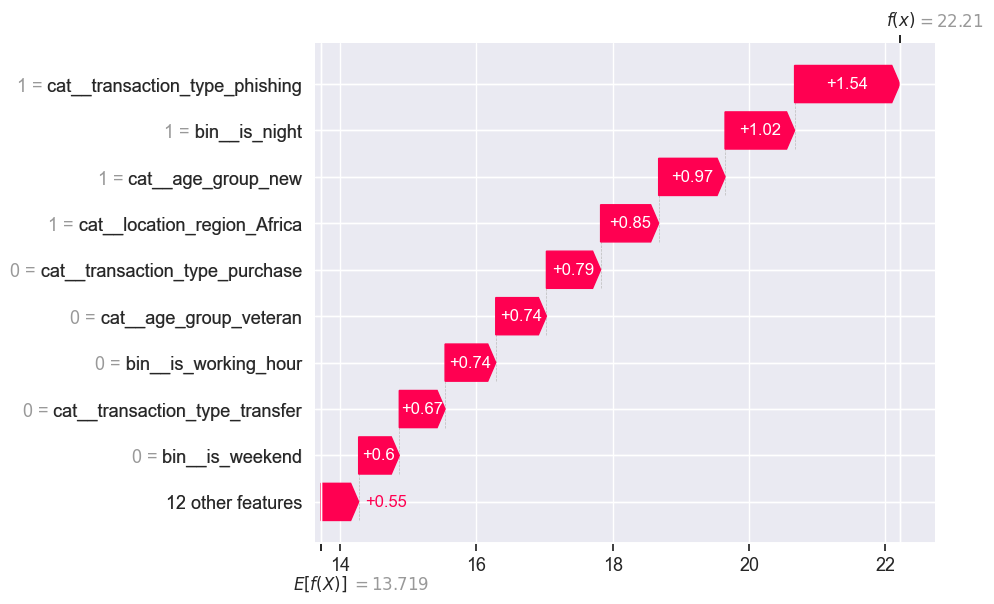

In [177]:
ecod_for_shap = ECOD(contamination=0.05)
ecod_for_shap.fit(X_transformed)

# Define prediction function (decision_function gives anomaly scores)
def ecod_predict(X_in):
    return ecod_for_shap.decision_function(X_in)

# Background sample (for KernelExplainer efficiency)
background = shap.sample(X_transformed, 100, random_state=42)

# Build KernelExplainer
ecod_explainer = shap.KernelExplainer(ecod_predict, background)

feature_names = preprocessor.get_feature_names_out()

# Global Summary Plot 
shap_values_all = ecod_explainer.shap_values(X_transformed[:200])
shap.summary_plot(shap_values_all, X_transformed[:200], feature_names=feature_names)

# Local explanation for transaction at iloc[143] ===
idx = 143
x_row = X_transformed[idx:idx+1]

# Compute SHAP values for this transaction
shap_values_ecod = ecod_explainer.shap_values(x_row)

# Waterfall Plot
shap.plots.waterfall(
    shap.Explanation(
        values=shap_values_ecod[0],   # <-- FIX: take 1D row
        base_values=ecod_explainer.expected_value,
        data=x_row[0],
        feature_names=feature_names
    )
)

How it works: Non-parametric; flags anomalies by looking at deviations in feature distributions (essentially: “how extreme is this value compared to expected distribution?”).

Insights:

Summary plot: 
> amount, session ratio, phishing/scam/sale transaction types, and region effects dominate.

Waterfall plot for this transaction:
> Extreme deviations in phishing, night, Africa region, and random purchase pattern were the biggest contributors.


Captures statistical extremity directly from feature distributions. No strong assumptions, so it adapts well when fraud patterns shift over time.

Business angle: Strong for early detection of novel fraud behaviors where distributions start to skew (e.g., sudden rise of phishing in new regions).